In [2]:
from utils.run import compute_total_degree
from evaluateModels import problems_from_densities, get_input_files

In [3]:
get_input_files

<function evaluateModels.get_input_files(input_dir)>

In [4]:
results_total_degree ={}

# for every folder in latte_gasp/data
import os
for folder_name in os.listdir("latte_gasp/data"):
    folder_results = {}
    # for every json file in it
    # for file_name in os.listdir(f"latte_gasp/data/{folder_name}"):
    #     file_results = []
    #     if file_name.endswith(".json"):
    #         # compute the total degree
    files = get_input_files(f"latte_gasp/data/{folder_name}")
    i = -1
    # results_per_file = {}
    for i, (filename, query_n, domain, support, weight) in enumerate(problems_from_densities(files)):
        results_total_degree[filename] = compute_total_degree(weight)
    # folder_results[folder_name] = results_per_file

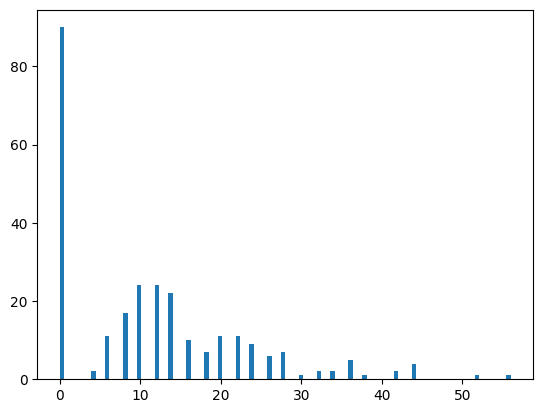

In [5]:
import matplotlib.pyplot as plt

plt.hist(results_total_degree.values(), bins=100)
plt.show()

In [6]:
results_total_degree["latte_gasp/data/r4_b0_d3_m10_e1_s666/r4_b0_d3_exp1_s666_01.json"]

6

In [7]:
import json

# delete gasp results
for folder_name in os.listdir("latte_gasp/results"):
    for file_name in os.listdir(f"latte_gasp/results/{folder_name}"):
        if file_name.endswith(".json"):
            # load json file
            filename = f"latte_gasp/results/{folder_name}/{file_name}"
            with open(filename, "r") as f:
                data = json.load(f)

            if data["wmi_id"] == "SAE4WMI_torch":
                # os.remove(filename)
                print(f"Deleted {filename}")

Deleted latte_gasp/results/r5_b0_d4_m10_e2_s666/latte_gasp_data_r5_b0_d4_m10_e2_s666_SAE4WMI_torch_1738979421.json
Deleted latte_gasp/results/r5_b0_d4_m10_e2_s666/latte_gasp_data_r5_b0_d4_m10_e2_s666_SAE4WMI_torch_1739032942.json
Deleted latte_gasp/results/r5_b0_d4_m10_e2_s666/latte_gasp_data_r5_b0_d4_m10_e2_s666_SAE4WMI_torch_1739034227.json
Deleted latte_gasp/results/r5_b0_d3_m10_e1_s666/latte_gasp_data_r5_b0_d3_m10_e1_s666_SAE4WMI_torch_1739033870.json
Deleted latte_gasp/results/r5_b0_d3_m10_e1_s666/latte_gasp_data_r5_b0_d3_m10_e1_s666_SAE4WMI_torch_1738977009.json
Deleted latte_gasp/results/r5_b0_d3_m10_e1_s666/latte_gasp_data_r5_b0_d3_m10_e1_s666_SAE4WMI_torch_1739032816.json
Deleted latte_gasp/results/r4_b0_d3_m10_e1_s666/latte_gasp_data_r4_b0_d3_m10_e1_s666_SAE4WMI_torch_1738976479.json
Deleted latte_gasp/results/r4_b0_d3_m10_e1_s666/latte_gasp_data_r4_b0_d3_m10_e1_s666_SAE4WMI_torch_1739032521.json
Deleted latte_gasp/results/r4_b0_d3_m10_e1_s666/latte_gasp_data_r4_b0_d3_m10_e1_

In [8]:
import json

count_failures = 0

# delete gasp results
for folder_name in os.listdir("latte_gasp/results"):
    for file_name in os.listdir(f"latte_gasp/results/{folder_name}"):
        if file_name.endswith(".json"):
            # load json file
            filename = f"latte_gasp/results/{folder_name}/{file_name}"
            with open(filename, "r") as f:
                data = json.load(f)

            if data["wmi_id"] == "SAE4WMI_torch":
                for result in data["results"]:
                    # if its not a float or can be converted to a float
                    if not isinstance(result["value"], float):
                        # print(f"weird! {filename}")
                        try:
                            float(result["value"])
                        except:
                            print(f"weird! {filename}")
                            # os.remove(filename)
                            # break
                            count_failures += 1

print(count_failures)

weird! latte_gasp/results/r5_b0_d4_m10_e2_s666/latte_gasp_data_r5_b0_d4_m10_e2_s666_SAE4WMI_torch_1739034227.json
weird! latte_gasp/results/r5_b0_d4_m10_e2_s666/latte_gasp_data_r5_b0_d4_m10_e2_s666_SAE4WMI_torch_1739034227.json
weird! latte_gasp/results/r5_b0_d4_m10_e2_s666/latte_gasp_data_r5_b0_d4_m10_e2_s666_SAE4WMI_torch_1739034227.json
weird! latte_gasp/results/r5_b0_d2_m10_e2_s666/latte_gasp_data_r5_b0_d2_m10_e2_s666_SAE4WMI_torch_1739033854.json
weird! latte_gasp/results/r5_b0_d3_m10_e2_s666/latte_gasp_data_r5_b0_d3_m10_e2_s666_SAE4WMI_torch_1739033885.json
weird! latte_gasp/results/r5_b0_d3_m10_e2_s666/latte_gasp_data_r5_b0_d3_m10_e2_s666_SAE4WMI_torch_1739033885.json
weird! latte_gasp/results/r4_b0_d4_m10_e2_s666/latte_gasp_data_r4_b0_d4_m10_e2_s666_SAE4WMI_torch_1739033697.json
weird! latte_gasp/results/r4_b0_d4_m10_e2_s666/latte_gasp_data_r4_b0_d4_m10_e2_s666_SAE4WMI_torch_1739033697.json
weird! latte_gasp/results/r4_b0_d4_m10_e2_s666/latte_gasp_data_r4_b0_d4_m10_e2_s666_SAE4

In [17]:
import latte_gasp_scatterplots as lgs

# retrieving results
results_files = []
for folder in [lgs.DEF_FOLDER]:
    for sub in os.listdir(folder):
        fullpath = os.path.join(folder, sub)
        if os.path.isfile(fullpath) and fullpath.endswith(".json"):
            results_files.append(fullpath)
        else:
            results_files.extend(
                [os.path.join(fullpath, f)
                    for f in os.listdir(fullpath)
                    if os.path.isfile(os.path.join(fullpath, f))
                    and f.endswith(".json")]
            )

print(f"Found {len(results_files)} results files.")

# parsing results
points = dict()
for res_file in results_files:

    with open(res_file, "r") as f:
        res_dict = json.load(f)
        int_name = res_dict["integrator"]["name"]
        assert(int_name in lgs.INTEGRATORS), f"{int_name} unsupported."
        int_id = lgs.INTEGRATORS.index(int_name)

        for entry in res_dict["results"]:

            p = entry["filename"]
            if p not in points:
                points[p] = [None, None]

            runtime = entry["parallel_time"]
            if points[p][int_id] is None or runtime < points[p][int_id]:
                points[p][int_id] = runtime
            # points[p][int_id] = runtime

print(f"Parsed {len(points)} points.")

# preprocessing results
def process(val):
    #if val is None: return MISSING_VAL
    return val or lgs.MISSING_VAL

import numpy as np

latte_faster_files = []

xs, ys = [], []
latte_faster = 0
min_val = np.inf
for key, xy in points.items():
    if results_total_degree[key] <= 20:
            continue
    if xy[0] is not None and  xy[1] is not None and xy[0] < xy[1]:
        latte_faster += 1
        print(f"LattE is faster on {key}.")
        latte_faster_files.append(key)
    if xy[0] is None:
        print(f"Missing value for {key} for latte.")
    if xy[1] is None:
        print(f"Missing value for {key} for torch.")
    x, y = map(process, xy)
    xs.append(x)
    ys.append(y)
    if x < min_val: min_val = x
    if y < min_val: min_val = y


print(f"Gasp (torch) is faster on {len(points) - latte_faster} points.")

Found 115 results files.
Parsed 270 points.
Gasp (torch) is faster on 270 points.


In [10]:
latte_faster_files

['latte_gasp/data/r4_b0_d2_m10_e1_s666/r4_b0_d2_exp1_s666_01.json',
 'latte_gasp/data/r3_b0_d3_m10_e0_s666/r3_b0_d3_exp0_s666_01.json',
 'latte_gasp/data/r3_b0_d3_m10_e2_s666/r3_b0_d3_exp2_s666_01.json',
 'latte_gasp/data/r4_b0_d2_m10_e0_s666/r4_b0_d2_exp0_s666_01.json',
 'latte_gasp/data/r3_b0_d2_m10_e1_s666/r3_b0_d2_exp1_s666_01.json',
 'latte_gasp/data/r3_b0_d2_m10_e0_s666/r3_b0_d2_exp0_s666_01.json',
 'latte_gasp/data/r3_b0_d3_m10_e1_s666/r3_b0_d3_exp1_s666_01.json']

In [11]:
for latte_faster_file in latte_faster_files:
    print(results_total_degree[latte_faster_file])

8
0
10
0
12
0
8


In [12]:
speedups = []
total_time_latte = 0
total_time_torch = 0

for key, xy in points.items():
    if xy[0] is not None and  xy[1] is not None:
        if results_total_degree[key] <= 30:
            continue
        speedups.append(xy[0] / xy[1])
        total_time_latte += xy[0]
        total_time_torch += xy[1]

# gemoetric mean
geo_mean = np.prod(speedups) ** (1 / len(speedups))
print(f"Geometric mean: {geo_mean:.2f}.")

print(f"Total time latte: {total_time_latte:.2f}s, torch: {total_time_torch:.2f}s.")

Geometric mean: 12.56.
Total time latte: 12146.01s, torch: 1611.34s.


In [13]:
len(speedups)

18

/disk/scratch/lkurscheidt/.conda/envs/wmipa/lib/python3.12/site-packages/matplotlib/scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


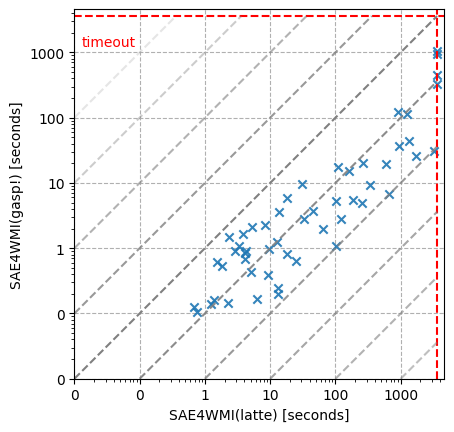

In [18]:
# plotting results
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title(lgs.TITLE)
ax.set_xlabel(lgs.XLABEL)
ax.set_ylabel(lgs.YLABEL)
ax.set_aspect("equal")

ax.set_xlim([10 ** lgs.MIN_EXP, lgs.TIMEOUT_VAL + 10**3])
ax.set_ylim([10 ** lgs.MIN_EXP, lgs.TIMEOUT_VAL + 10**3])
ax.set_xscale("log")
ax.set_yscale("log")
    
ax.axhline(lgs.TIMEOUT_VAL, 0, lgs.TIMEOUT_VAL, linestyle="--", color=lgs.TIMEOUT_COLOR) # timeout lines and label
ax.axvline(lgs.TIMEOUT_VAL, 0, lgs.TIMEOUT_VAL, linestyle="--", color=lgs.TIMEOUT_COLOR)
ax.annotate("timeout", (0.02, 0.9), xycoords='axes fraction', color=lgs.TIMEOUT_COLOR)

ax.plot([10 ** lgs.MIN_EXP, lgs.TIMEOUT_VAL], [10 ** lgs.MIN_EXP, lgs.TIMEOUT_VAL], linestyle="--", color=lgs.DIAGONAL_COLOR) # diagonals
for i in range(1, 6):
    ax.plot([10 ** (lgs.MIN_EXP + i), lgs.TIMEOUT_VAL], [10 ** lgs.MIN_EXP, 10**(np.log10(lgs.TIMEOUT_VAL) - i)], linestyle="--", color=lgs.DIAGONAL_COLOR, alpha=(1 - 0.1*i))
    ax.plot([10 ** lgs.MIN_EXP, 10**(np.log10(lgs.TIMEOUT_VAL) - i)], [10 ** (lgs.MIN_EXP + i), lgs.TIMEOUT_VAL], linestyle="--", color=lgs.DIAGONAL_COLOR, alpha=(1 - 0.2*i))

ax.scatter(xs, ys, marker=lgs.MARKER, color=lgs.COLOR, alpha=lgs.ALPHA)

# plot x and y grid lines, but only major ticks
ax.xaxis.set_major_formatter(plt.ScalarFormatter())
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=15))
ax.yaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=15))
ax.grid(which="major", axis="both", linestyle="--")
ax.set_axisbelow(True)

plt.savefig("scatter.pdf", bbox_inches='tight', pad_inches=0)
plt.show()